In [251]:
import datetime

from model import *
from random_hpo import *
from grid_search import *
from experiment_helper import *
from bayesian_optimizer import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Optimization for Machine Learning

### Experiment 1: Gradient descent tuning

In [236]:
# experiment parameters
seed = 0
num_trials = 5
variable_parameters = {'lr', 'momentum', 'mini_batch_size'}
fixed_parameters = {'num_hidden', 'num_layers', 'num_epochs'}

# fixed parameters
num_layers = 2
num_hidden = 100
num_epochs = 100

# variable parameters
lr_min, lr_max = 0.0001, 0.1
mini_batch_size_min, mini_batch_size_max = 1, 4096
momentum_min, momentum_max = 0.0, 1.0

#### Random search

In [258]:
parameters_range = {'lr': (lr_min, lr_max, 'discrete_loguniform_10'),
                    'mini_batch_size': (mini_batch_size_min, mini_batch_size_max, 'discrete_loguniform_2'),
                    'momentum': (momentum_min, momentum_max, 'uniform'),
                    'num_hidden': (num_hidden, num_hidden, 'fixed'),
                    'num_layers': (num_layers, num_layers, 'fixed'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}
parameters = random_hyperparameters(parameters_range, num_trials, seed)

In [260]:
train_data, test_data, time_data = run_experiment(parameters)

RuntimeError: start (0) + length (2048) exceeds dimension size (1000).

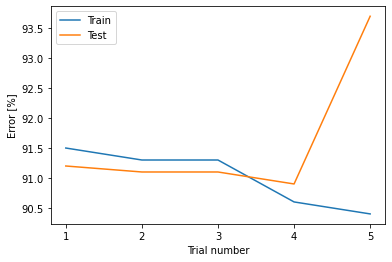

In [261]:
visualize_experiment(train_data, test_data)

#### Grid search

In [262]:
parameters_range = {'lr': (lr_min, lr_max),
                    'mini_batch_size': (mini_batch_size_min, mini_batch_size_max),
                    'momentum': (momentum_min, momentum_max),
                    'num_hidden': (num_hidden, num_hidden),
                    'num_layers': (num_layers, num_layers),
                    'num_epochs': (num_epochs, num_epochs)}
parameters = grid_hyperparameters(parameters_range, num_trials)

In [263]:
train_data, test_data, time_data = run_experiment(parameters)

RuntimeError: start (820) + length (820) exceeds dimension size (1000).

In [ ]:
visualize_experiment(train_data, test_data)

#### Bayesian optimisation

### Experiment 2: Model architecture tuning

In [289]:
# experiment parameters
seed = 0
num_trials = 5
variable_parameters = {'num_hidden', 'num_layers', 'num_epochs'}
fixed_parameters = {'lr', 'momentum', 'mini_batch_size'}

# fixed parameters
lr = 0.1
momentum = 0.9
mini_batch_size = 100

# variable parameters
num_hidden_min, num_hidden_max = 10, 1000
num_layers_min, num_layers_max = 1, 4
num_epochs_min, num_epochs_max = 10, 1000

#### Random search

In [290]:
parameters_range = {'lr': (lr, lr, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 'fixed'),
                    'momentum': (momentum, momentum, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, 'discrete'),
                    'num_layers': (num_layers_min, num_layers_max, 'discrete'),
                    'num_epochs': (num_epochs_min, num_epochs_max, 'discrete')}
parameters = random_hyperparameters(parameters_range, num_trials, seed)

In [291]:
train_data, test_data, time_data = run_experiment(parameters)

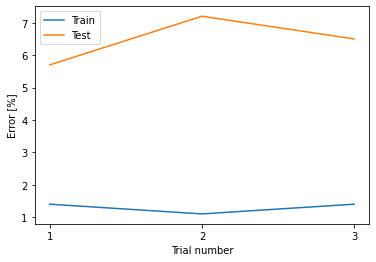

In [292]:
visualize_experiment(train_data, test_data)

#### Grid search

In [228]:
parameters_range = {'lr': (lr, lr),
                    'mini_batch_size': (mini_batch_size, mini_batch_size),
                    'momentum': (momentum, momentum),
                    'num_hidden': (num_hidden_min, num_hidden_max),
                    'num_layers': (num_layers_min, num_layers_max),
                    'num_epochs': (num_epochs_min, num_epochs_max)}
parameters = grid_hyperparam(parameters_range, num_trials)

In [229]:
train_data, test_data, time_data = run_experiment(parameters)

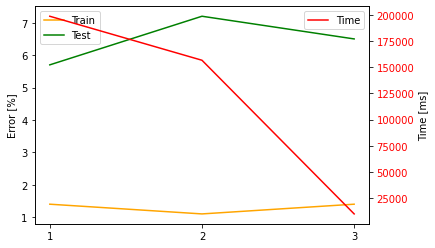

In [306]:
visualize_experiment(train_data, test_data, time_data)

#### Bayesian optimisation

### Experiment 3: Complete tuning